### News about PyPerf Jupyter Kernel (Performance Monitoring and Analysis in Jupyter)
- added metrics to display in Jupyter (mean/max/min, raw values) for: CPU,GPU,Mem
- use dropdown menus to select metrics (interactively)
- use in-memory serialization instead of disk-based for Score-P execution
- modular system for backbone serializer (dill/cloudpickle)

---

In [1]:
%matplotlib ipympl

**Toy Example:** Estimating Pi by Throwing Darts

In [2]:
%env JUMPER_REPORT_FREQUENCY=2

env: JUMPER_REPORT_FREQUENCY=2


In [3]:
%env JUMPER_REPORTS_MIN=2

env: JUMPER_REPORTS_MIN=2


In [4]:
from random import random
from time import time
from multiprocessing import Pool
import sys

In [5]:
def throw_dart(iterations: int) -> int:
    hits = 0
    for i in range(iterations):
        x = random()
        y = random()
        if (x * x) + (y * y) <= 1:
            hits = hits + 1
    return hits


def compute_pi(iterations, process_count):
    pool = Pool(processes=process_count)
    trials_per_process = [int(iterations / process_count)] * process_count

    start = time()

    hits = pool.map(throw_dart, trials_per_process)
    pi = (sum(hits) * 4) / iterations

    end = time()

    print(pi)

In [6]:
# 10⁹ iterations on 2 CPUs
compute_pi(10**8, 2)

3.141827

----Performance Data----
Duration: 16.33

CPU Util (Across CPUs)       	AVG: 48.88	 MIN: 0.00	 MAX: 100.00
Mem Util in GB (Across nodes)	AVG: 13.16	 MIN: 13.15	 MAX: 13.17
IO Ops (excl.) Read          	Total: 3708
               Write         	Total: 321
IO Bytes (excl.) Read        	Total: 0.00
                 Write       	Total: 0.23


In [7]:
# 10⁹ iterations on 8 CPUs
compute_pi(10**8, 8)

3.14140056

----Performance Data----
Duration: 9.68

CPU Util (Across CPUs)       	AVG: 100.00	 MIN: 100.00	 MAX: 100.00
Mem Util in GB (Across nodes)	AVG: 13.16	 MIN: 13.15	 MAX: 13.18
IO Ops (excl.) Read          	Total: 4058
               Write         	Total: 411
IO Bytes (excl.) Read        	Total: 0.00
                 Write       	Total: 0.27


Button(description='Add Display', style=ButtonStyle())

Output()

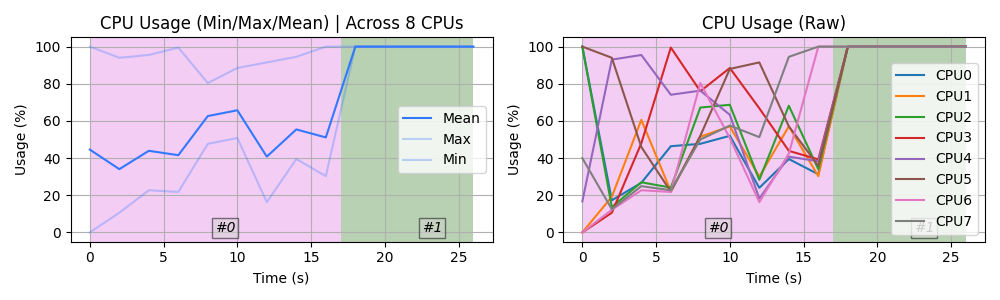

In [8]:
%%display_graph_for_all

In [9]:
%%display_code_history

In [10]:
%%display_code_for_index 0

Cell timestamp: 2024-08-22 14:44:09.992393
--
# 10⁹ iterations on 2 CPUs
compute_pi(10**8, 2)

In [11]:
%%display_code_for_index 1

Cell timestamp: 2024-08-22 14:44:20.687951
--
# 10⁹ iterations on 8 CPUs
compute_pi(10**8, 8)

Button(description='Add Display', style=ButtonStyle())

Output()

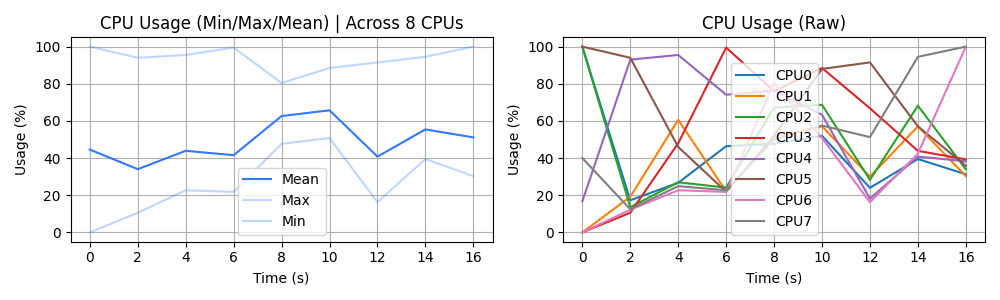

In [12]:
%%display_graph_for_index 0

Button(description='Add Display', style=ButtonStyle())

Output()

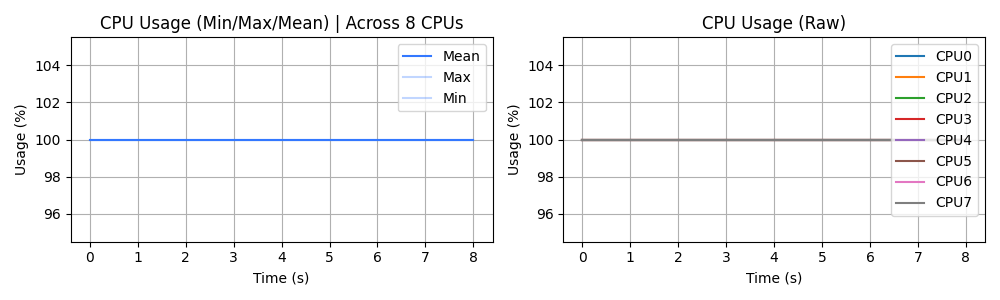

In [13]:
%%display_graph_for_last

In [14]:
%%perfdata_to_variable myvar

Exported performance data to myvar variable

In [15]:
myvar

[[[[[100.0, 17.3, 26.7, 46.4, 47.7, 52.0, 24.0, 39.5, 31.3],
    [0.0, 19.2, 60.6, 22.1, 51.5, 57.1, 30.0, 57.1, 30.3],
    [100.0, 13.6, 27.0, 24.1, 67.2, 68.7, 28.3, 68.2, 34.0],
    [0.0, 10.6, 48.0, 99.5, 76.0, 88.5, 66.8, 43.9, 39.3],
    [16.7, 93.0, 95.5, 74.1, 76.3, 63.3, 18.2, 40.8, 38.3],
    [100.0, 94.0, 46.0, 21.9, 52.0, 88.0, 91.5, 57.1, 35.9],
    [0.0, 12.2, 22.7, 21.8, 80.4, 50.8, 16.3, 42.4, 100.0],
    [40.0, 12.5, 24.9, 22.7, 50.0, 57.5, 51.3, 94.5, 100.0],
    [44.5875, 34.05, 43.925, 41.575, 62.6375, 65.7375, 40.8, 55.4375, 51.1375],
    [100.0, 94.0, 95.5, 99.5, 80.4, 88.5, 91.5, 94.5, 100.0],
    [0.0, 10.6, 22.7, 21.8, 47.7, 50.8, 16.3, 39.5, 30.3]],
   [13.149856567382812,
    13.162960052490234,
    13.167915344238281,
    13.15689468383789,
    13.153888702392578,
    13.15069580078125,
    13.156208038330078,
    13.163280487060547,
    13.16348648071289],
   [3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3708],
   [321, 321, 321, 321, 321, 321, 321, 321,

In [16]:
%%perfdata_to_json myfile

Exported performance data to myfile_perfdata.json and myfile_code.json

---
**Plans:**
- retrieve metrics on multiple nodes (add network, psutil delivers that)
- parallel serialization (for scorep)
- show index as thumbnail or so when hovering the graphs